GENERATE DATA

In [2]:
import pandas as pd
import numpy as np

# Number of shoppers
num_shoppers = 200

# Generate random data
data = {
    'TotalItems': np.random.randint(5, 21, num_shoppers),  # Random number of items between 5 and 20
    'Algo1Time': np.random.uniform(10, 30, num_shoppers),  # Random time for Algo#1
    'Algo2Time': np.random.uniform(12, 35, num_shoppers)   # Random time for Algo#2
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('random_data.csv', index=False, header=False)

# Display the generated DataFrame
print("Random Data:")
print(df)


Random Data:
     TotalItems  Algo1Time  Algo2Time
0            20  21.071265  30.227352
1             8  11.768790  32.908190
2            15  20.710277  22.414833
3            10  13.505326  13.338343
4            10  11.527821  32.017580
..          ...        ...        ...
195           9  24.805211  20.703302
196          11  23.599426  25.393643
197           5  26.172577  30.109192
198           6  24.165058  17.627525
199          19  18.733900  22.239875

[200 rows x 3 columns]


PLOT DATA

Average Time per Item for Algo1: 1.97
Average Time per Item for Algo2: 2.33
Average Time per Item for Algo3: 2.68

ML-DProSA vs No Algorithm: 36.01%
ML-DProSA vs Brute Force Sort: 14.93%


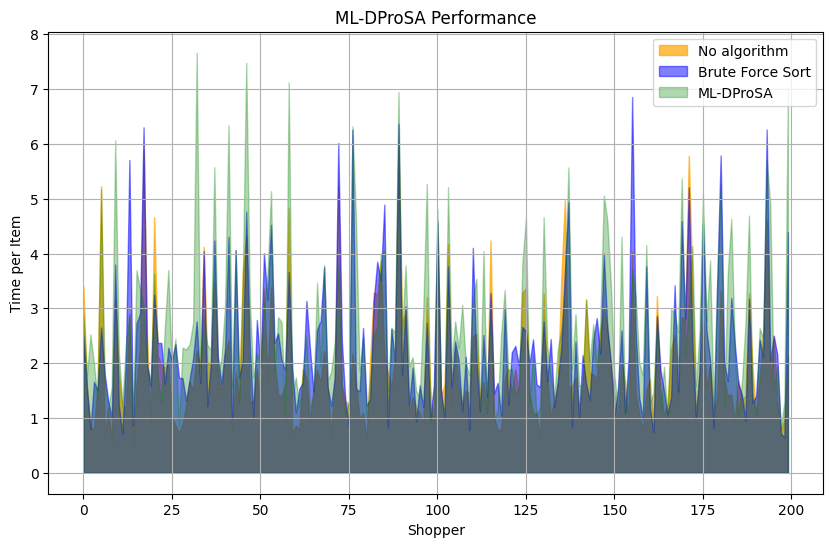

In [26]:
import pandas as pd
from tkinter import filedialog
import matplotlib.pyplot as plt

# file_path = filedialog.askopenfilename(filetypes=[("CSV files", "*.csv")])
file_path = 'random_data.csv'
df = pd.read_csv(file_path, header=None)  # Assuming the CSV file has no header

df['TimePerItem_Algo1'] = df.iloc[:, 1] / df.iloc[:, 0]
df['TimePerItem_Algo2'] = df.iloc[:, 2] / df.iloc[:, 0]
df['TimePerItem_Algo3'] = df.iloc[:, 3] / df.iloc[:, 0]

avg_time_per_item_algo1 = df['TimePerItem_Algo1'].mean()
avg_time_per_item_algo2 = df['TimePerItem_Algo2'].mean()
avg_time_per_item_algo3 = df['TimePerItem_Algo3'].mean()

percentage_difference1 = ((avg_time_per_item_algo3 - avg_time_per_item_algo1) / avg_time_per_item_algo1) * 100
percentage_difference2 = ((avg_time_per_item_algo3 - avg_time_per_item_algo2) / avg_time_per_item_algo2) * 100

print(f"Average Time per Item for Algo1: {avg_time_per_item_algo1:.2f}")
print(f"Average Time per Item for Algo2: {avg_time_per_item_algo2:.2f}")
print(f"Average Time per Item for Algo3: {avg_time_per_item_algo3:.2f}\n")
print(f"ML-DProSA vs No Algorithm: {percentage_difference1:.2f}%")
print(f"ML-DProSA vs Brute Force Sort: {percentage_difference2:.2f}%")

plt.figure(figsize=(10, 6))

plt.fill_between(df.index, df['TimePerItem_Algo1'], label='No algorithm', alpha=0.7, color='orange')
plt.fill_between(df.index, df['TimePerItem_Algo2'], label='Brute Force Sort', alpha=0.5, color='blue')
plt.fill_between(df.index, df['TimePerItem_Algo3'], label='ML-DProSA', alpha=0.3, color='green')

plt.title('ML-DProSA Performance')
plt.xlabel('Shopper')
plt.ylabel('Time per Item')
plt.legend()
plt.grid(True)

plt.show()
